In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [103]:
# Load the dataset
df = pd.read_excel('./CustomRetain.xlsx')
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300


In [104]:
df["Location"].value_counts()

Rural       3402
Suburban    3311
Urban       3287
Name: Location, dtype: int64

In [105]:
df["Social_Class"].value_counts()

2    3833
3    3799
1    2368
Name: Social_Class, dtype: int64

In [106]:
df["Subscription_Type"].value_counts()

B    2402
C    2281
E    2232
D    1567
A    1518
Name: Subscription_Type, dtype: int64

In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Subscription_Type column
df['Subscription_Type_Encoded'] = label_encoder.fit_transform(df['Subscription_Type'])

# Display the first few rows to verify the encoding
print(df.head())

# Optionally, you can check the classes and their corresponding labels
print("Classes and their corresponding labels:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label}: {i}")


   CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662

In [80]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge,Subscription_Type_Encoded
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100,0
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300,2
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400,3
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200,1
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300,2


/Users/pranav/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranav/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranav/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranav/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

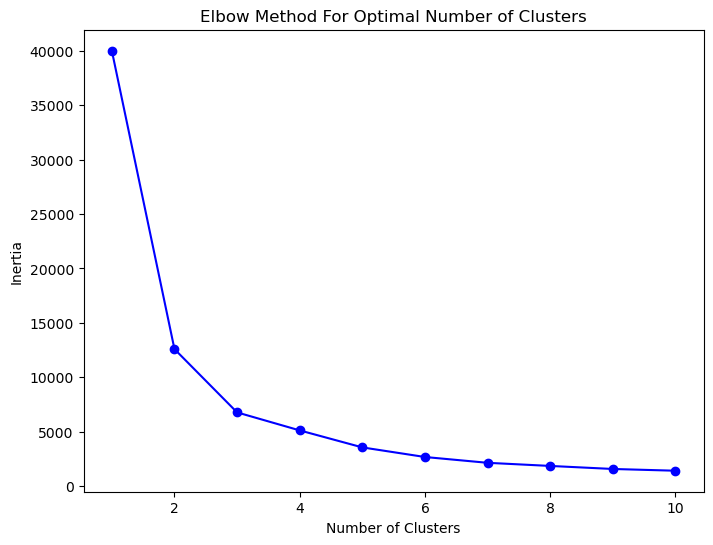

In [81]:

# Select the features for clustering
#features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
 #              'Subscription_Length_Months', 'Social_Class']]
features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
               'Subscription_Type_Encoded']]
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for ease of use
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Use the Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [82]:
from sklearn.cluster import KMeans

# Apply K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_df)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Display the first few rows to check the clusters
print(df.head())

/Users/pranav/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662

In [83]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge,Subscription_Type_Encoded,Cluster
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100,0,5
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300,2,3
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400,3,0
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200,1,7
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Customer_9996,55,Male,Suburban,34,676.156043,64.540758,3,158.962291,2,C,300,2,6
9996,9997,Customer_9997,51,Female,Rural,16,337.508892,10.041086,0,128.771894,1,B,200,1,7
9997,9998,Customer_9998,57,Female,Rural,27,1483.984362,401.194578,1,397.613115,3,E,500,4,2
9998,9999,Customer_9999,64,Male,Suburban,4,311.640946,87.497384,0,27.245347,1,B,200,1,1


In [102]:
df["Location"].value_counts()

Rural       3402
Suburban    3311
Urban       3287
Name: Location, dtype: int64

In [84]:
df['churn_label'] = np.random.choice([0, 1], size=len(df), p=[0.65, 0.35])

In [85]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge,Subscription_Type_Encoded,Cluster,churn_label
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100,0,5,1
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300,2,3,0
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400,3,0,0
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200,1,7,0
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Customer_9996,55,Male,Suburban,34,676.156043,64.540758,3,158.962291,2,C,300,2,6,0
9996,9997,Customer_9997,51,Female,Rural,16,337.508892,10.041086,0,128.771894,1,B,200,1,7,1
9997,9998,Customer_9998,57,Female,Rural,27,1483.984362,401.194578,1,397.613115,3,E,500,4,2,0
9998,9999,Customer_9999,64,Male,Suburban,4,311.640946,87.497384,0,27.245347,1,B,200,1,1,1


In [86]:
df['churn_label'].value_counts()

0    6422
1    3578
Name: churn_label, dtype: int64

In [87]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Average_Internet_Usage',
       'No_of_Tickets', 'Average_Talktime_Usage', 'Social_Class',
       'Subscription_Type', 'Base_Charge', 'Subscription_Type_Encoded',
       'Cluster', 'churn_label'],
      dtype='object')

In [88]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Average_Internet_Usage        float64
No_of_Tickets                   int64
Average_Talktime_Usage        float64
Social_Class                    int64
Subscription_Type              object
Base_Charge                     int64
Subscription_Type_Encoded       int64
Cluster                         int32
churn_label                     int64
dtype: object

In [100]:
X.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Average_Internet_Usage', 'No_of_Tickets', 'Average_Talktime_Usage',
       'Social_Class', 'Base_Charge', 'Subscription_Type_Encoded', 'Cluster',
       'Location_Encoded', 'Gender_Encoded'],
      dtype='object')

In [90]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Subscription_Type column
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])
df["Gender_Encoded"] = label_encoder.fit_transform(df['Gender'])

X = df.drop(columns=['churn_label', 'CustomerID', 'Name', 'Subscription_Type', 'Gender', 'Location'])
y = df['churn_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [91]:
class FixedNeuronsNetwork(nn.Module):
    def __init__(self, num_features, num_classes, num_hidden_layers, hidden_neurons, layer_activation=nn.ReLU, final_activation=nn.Sigmoid):
        super(FixedNeuronsNetwork, self).__init__()
        
        layers = []
        
        layers.append(nn.Linear(num_features, hidden_neurons))
        layers.append(layer_activation())
        
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(layer_activation())
        
        layers.append(nn.Linear(hidden_neurons, num_classes))
        
        self.final_activation = final_activation()
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.network(x)
        output = self.final_activation(x)
        return output

In [92]:
def train_model(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs, device,patience):
    train_loss_history = []
    val_loss_history = []
    best_val_loss = float('inf')
    patience = patience  # Number of epochs to wait before stopping
    patience_counter = 0
    best_model = None

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0
        all_train_targets = []
        all_train_preds = []

        # Training loop
        with tqdm(total=len(train_loader), desc=f'Epoch [{epoch + 1}/{num_epochs}]', unit='batch') as pbar:
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                
                # Calculate loss
                loss = criterion(outputs, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_train_loss += loss.item() * inputs.size(0)

                # Store targets and predictions for F1 score calculation
                all_train_targets.extend(targets.cpu().numpy())
                all_train_preds.extend(outputs.cpu().detach().numpy())

                # Update the progress bar
                pbar.set_postfix(loss=loss.item())
                pbar.update(1)

        # Calculate average training loss and F1 score for training
        avg_train_loss = total_train_loss / len(train_loader.dataset)
        train_loss_history.append(avg_train_loss)

        train_f1 = f1_score(np.squeeze(all_train_targets), np.where(np.squeeze(all_train_preds) > 0.5, 1, 0), pos_label=1, average='binary')

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        all_val_targets = []
        all_val_preds = []

        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)

                loss = criterion(outputs, targets)
                total_val_loss += loss.item() * inputs.size(0)

                all_val_targets.extend(targets.cpu().numpy())
                all_val_preds.extend(outputs.cpu().detach().numpy())

        # Calculate average validation loss and F1 score
        avg_val_loss = total_val_loss / len(test_loader.dataset)
        val_loss_history.append(avg_val_loss)

        val_f1 = f1_score(np.squeeze(all_val_targets), np.where(np.squeeze(all_val_preds) > 0.5, 1, 0), pos_label=1, average='binary')

        # Print training and validation results
        print(f"Epoch [{epoch + 1}/{num_epochs}] - Avg Train Loss: {avg_train_loss:.4f} | Train F1: {train_f1:.4f} | Avg Val Loss: {avg_val_loss:.4f} | Val F1: {val_f1:.4f}")

        # Step the learning rate scheduler
        scheduler.step(avg_train_loss)

        # Early stopping based on F1 score and patience counter
        if val_f1 > 0.8:
            print(f"Stopping training early at epoch {epoch + 1} as validation F1 score exceeded 0.8.")
            break

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict()  # Save best model weights
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs with no improvement.")
            break

    model.load_state_dict(best_model)  # Load the best model before returning
    return model, train_loss_history, val_loss_history, train_f1, val_f1

In [93]:
def create_data_loader(x_train, x_test, y_train, y_test, batch_size, sampling = True):
    """
    Takes input as torch tensors and creates data loaders.
    """
    
    # Create TensorDatasets and move them to the specified device
    train_dataset = TensorDataset(x_train, y_train.reshape(-1,1))
    test_dataset = TensorDataset(x_test, y_test.reshape(-1,1))
    
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    if sampling:
        class_counts = torch.bincount(y_train.long().view(-1))
        total_samples = len(y_train)
        class_weights = total_samples / (len(class_counts) * class_counts.float())
        sample_weights = class_weights[y_train.long().view(-1)]
        
        sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(y_train), replacement=True)

        # Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler = sampler, shuffle=False)
    else:
        # Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor,batch_size=512)

In [98]:
input_size

12

In [94]:
input_size = X_train_tensor.shape[1]
device = 'cpu'
model = FixedNeuronsNetwork(num_features=X_train_tensor.shape[1],num_classes=1,num_hidden_layers=3,hidden_neurons=64).to(device)
num_epochs = 100
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

model, train_loss_history, val_loss_history, train_f1, val_f1 = train_model(model,criterion,
                                                                            optimizer,scheduler,
                                                                            train_loader,test_loader,num_epochs,device,patience=float('inf'))

Epoch [1/100]: 100%|████████████| 16/16 [00:00<00:00, 277.04batch/s, loss=0.694]


Epoch [1/100] - Avg Train Loss: 0.6936 | Train F1: 0.5648 | Avg Val Loss: 0.6960 | Val F1: 0.4943


Epoch [2/100]: 100%|████████████| 16/16 [00:00<00:00, 456.45batch/s, loss=0.693]


Epoch [2/100] - Avg Train Loss: 0.6930 | Train F1: 0.5120 | Avg Val Loss: 0.6922 | Val F1: 0.3732


Epoch [3/100]: 100%|████████████| 16/16 [00:00<00:00, 458.57batch/s, loss=0.693]


Epoch [3/100] - Avg Train Loss: 0.6928 | Train F1: 0.5017 | Avg Val Loss: 0.6973 | Val F1: 0.4847


Epoch [4/100]: 100%|████████████| 16/16 [00:00<00:00, 463.29batch/s, loss=0.693]


Epoch [4/100] - Avg Train Loss: 0.6929 | Train F1: 0.6371 | Avg Val Loss: 0.6941 | Val F1: 0.4294


Epoch [5/100]: 100%|████████████| 16/16 [00:00<00:00, 464.80batch/s, loss=0.696]


Epoch [5/100] - Avg Train Loss: 0.6929 | Train F1: 0.2142 | Avg Val Loss: 0.6841 | Val F1: 0.0220


Epoch [6/100]: 100%|█████████████| 16/16 [00:00<00:00, 471.96batch/s, loss=0.69]


Epoch [6/100] - Avg Train Loss: 0.6927 | Train F1: 0.3215 | Avg Val Loss: 0.6932 | Val F1: 0.4180


Epoch [7/100]: 100%|████████████| 16/16 [00:00<00:00, 149.15batch/s, loss=0.692]


Epoch [7/100] - Avg Train Loss: 0.6926 | Train F1: 0.4639 | Avg Val Loss: 0.6958 | Val F1: 0.4485


Epoch [8/100]: 100%|████████████| 16/16 [00:00<00:00, 488.37batch/s, loss=0.692]


Epoch [8/100] - Avg Train Loss: 0.6926 | Train F1: 0.6206 | Avg Val Loss: 0.6984 | Val F1: 0.4795


Epoch [9/100]: 100%|████████████| 16/16 [00:00<00:00, 476.16batch/s, loss=0.692]


Epoch [9/100] - Avg Train Loss: 0.6922 | Train F1: 0.5844 | Avg Val Loss: 0.6926 | Val F1: 0.3914


Epoch [10/100]: 100%|███████████| 16/16 [00:00<00:00, 486.77batch/s, loss=0.694]


Epoch [10/100] - Avg Train Loss: 0.6928 | Train F1: 0.4974 | Avg Val Loss: 0.6933 | Val F1: 0.4085


Epoch [11/100]: 100%|███████████| 16/16 [00:00<00:00, 480.54batch/s, loss=0.695]


Epoch [11/100] - Avg Train Loss: 0.6921 | Train F1: 0.5784 | Avg Val Loss: 0.6970 | Val F1: 0.4551


Epoch [12/100]: 100%|███████████| 16/16 [00:00<00:00, 477.47batch/s, loss=0.691]


Epoch [12/100] - Avg Train Loss: 0.6922 | Train F1: 0.4894 | Avg Val Loss: 0.6901 | Val F1: 0.3477


Epoch [13/100]: 100%|████████████| 16/16 [00:00<00:00, 488.27batch/s, loss=0.69]


Epoch [13/100] - Avg Train Loss: 0.6917 | Train F1: 0.5479 | Avg Val Loss: 0.6964 | Val F1: 0.4433


Epoch [14/100]: 100%|███████████| 16/16 [00:00<00:00, 485.76batch/s, loss=0.689]


Epoch [14/100] - Avg Train Loss: 0.6923 | Train F1: 0.5564 | Avg Val Loss: 0.6986 | Val F1: 0.4561


Epoch [15/100]: 100%|███████████| 16/16 [00:00<00:00, 471.57batch/s, loss=0.693]


Epoch [15/100] - Avg Train Loss: 0.6922 | Train F1: 0.5204 | Avg Val Loss: 0.6983 | Val F1: 0.4645


Epoch [16/100]: 100%|███████████| 16/16 [00:00<00:00, 478.84batch/s, loss=0.691]


Epoch [16/100] - Avg Train Loss: 0.6920 | Train F1: 0.6022 | Avg Val Loss: 0.6872 | Val F1: 0.3079


Epoch [17/100]: 100%|███████████| 16/16 [00:00<00:00, 492.22batch/s, loss=0.689]


Epoch [17/100] - Avg Train Loss: 0.6912 | Train F1: 0.5296 | Avg Val Loss: 0.6937 | Val F1: 0.4134


Epoch [18/100]: 100%|███████████| 16/16 [00:00<00:00, 355.37batch/s, loss=0.691]


Epoch [18/100] - Avg Train Loss: 0.6913 | Train F1: 0.4653 | Avg Val Loss: 0.6936 | Val F1: 0.3919


Epoch [19/100]: 100%|███████████| 16/16 [00:00<00:00, 452.13batch/s, loss=0.691]


Epoch [19/100] - Avg Train Loss: 0.6907 | Train F1: 0.6234 | Avg Val Loss: 0.6955 | Val F1: 0.4397


Epoch [20/100]: 100%|███████████| 16/16 [00:00<00:00, 477.44batch/s, loss=0.697]


Epoch [20/100] - Avg Train Loss: 0.6905 | Train F1: 0.4927 | Avg Val Loss: 0.6880 | Val F1: 0.3422


Epoch [21/100]: 100%|████████████| 16/16 [00:00<00:00, 483.82batch/s, loss=0.69]


Epoch [21/100] - Avg Train Loss: 0.6917 | Train F1: 0.5183 | Avg Val Loss: 0.6951 | Val F1: 0.4153


Epoch [22/100]: 100%|███████████| 16/16 [00:00<00:00, 480.12batch/s, loss=0.694]


Epoch [22/100] - Avg Train Loss: 0.6899 | Train F1: 0.5674 | Avg Val Loss: 0.6906 | Val F1: 0.3671


Epoch [23/100]: 100%|███████████| 16/16 [00:00<00:00, 463.93batch/s, loss=0.685]


Epoch [23/100] - Avg Train Loss: 0.6884 | Train F1: 0.4910 | Avg Val Loss: 0.6943 | Val F1: 0.4053


Epoch [24/100]: 100%|███████████| 16/16 [00:00<00:00, 472.84batch/s, loss=0.684]


Epoch [24/100] - Avg Train Loss: 0.6874 | Train F1: 0.5602 | Avg Val Loss: 0.6932 | Val F1: 0.3978


Epoch [25/100]: 100%|███████████| 16/16 [00:00<00:00, 477.28batch/s, loss=0.685]


Epoch [25/100] - Avg Train Loss: 0.6875 | Train F1: 0.5835 | Avg Val Loss: 0.7009 | Val F1: 0.4330


Epoch [26/100]: 100%|███████████| 16/16 [00:00<00:00, 460.27batch/s, loss=0.677]


Epoch [26/100] - Avg Train Loss: 0.6890 | Train F1: 0.5215 | Avg Val Loss: 0.7065 | Val F1: 0.4625


Epoch [27/100]: 100%|███████████| 16/16 [00:00<00:00, 471.88batch/s, loss=0.685]


Epoch [27/100] - Avg Train Loss: 0.6881 | Train F1: 0.5462 | Avg Val Loss: 0.6904 | Val F1: 0.3586


Epoch [28/100]: 100%|███████████| 16/16 [00:00<00:00, 467.26batch/s, loss=0.692]


Epoch [28/100] - Avg Train Loss: 0.6861 | Train F1: 0.5365 | Avg Val Loss: 0.6929 | Val F1: 0.3835


Epoch [29/100]: 100%|███████████| 16/16 [00:00<00:00, 457.73batch/s, loss=0.685]


Epoch [29/100] - Avg Train Loss: 0.6867 | Train F1: 0.5691 | Avg Val Loss: 0.6997 | Val F1: 0.4264


Epoch [30/100]: 100%|███████████| 16/16 [00:00<00:00, 475.61batch/s, loss=0.689]


Epoch [30/100] - Avg Train Loss: 0.6853 | Train F1: 0.5747 | Avg Val Loss: 0.6870 | Val F1: 0.3494


Epoch [31/100]: 100%|███████████| 16/16 [00:00<00:00, 459.03batch/s, loss=0.674]


Epoch [31/100] - Avg Train Loss: 0.6860 | Train F1: 0.5165 | Avg Val Loss: 0.6859 | Val F1: 0.3208


Epoch [32/100]: 100%|███████████| 16/16 [00:00<00:00, 457.37batch/s, loss=0.686]


Epoch [32/100] - Avg Train Loss: 0.6845 | Train F1: 0.5597 | Avg Val Loss: 0.6965 | Val F1: 0.3981


Epoch [33/100]: 100%|███████████| 16/16 [00:00<00:00, 471.87batch/s, loss=0.684]


Epoch [33/100] - Avg Train Loss: 0.6825 | Train F1: 0.5966 | Avg Val Loss: 0.6889 | Val F1: 0.3536


Epoch [34/100]: 100%|███████████| 16/16 [00:00<00:00, 478.21batch/s, loss=0.678]


Epoch [34/100] - Avg Train Loss: 0.6831 | Train F1: 0.5534 | Avg Val Loss: 0.6908 | Val F1: 0.3641


Epoch [35/100]: 100%|███████████| 16/16 [00:00<00:00, 489.19batch/s, loss=0.692]


Epoch [35/100] - Avg Train Loss: 0.6847 | Train F1: 0.5164 | Avg Val Loss: 0.6972 | Val F1: 0.3796


Epoch [36/100]: 100%|███████████| 16/16 [00:00<00:00, 479.77batch/s, loss=0.683]


Epoch [36/100] - Avg Train Loss: 0.6819 | Train F1: 0.5488 | Avg Val Loss: 0.6988 | Val F1: 0.4108


Epoch [37/100]: 100%|███████████| 16/16 [00:00<00:00, 490.19batch/s, loss=0.677]


Epoch [37/100] - Avg Train Loss: 0.6812 | Train F1: 0.5556 | Avg Val Loss: 0.7075 | Val F1: 0.4272


Epoch [38/100]: 100%|███████████| 16/16 [00:00<00:00, 484.91batch/s, loss=0.678]


Epoch [38/100] - Avg Train Loss: 0.6805 | Train F1: 0.5434 | Avg Val Loss: 0.7220 | Val F1: 0.4658


Epoch [39/100]: 100%|███████████| 16/16 [00:00<00:00, 489.97batch/s, loss=0.684]


Epoch [39/100] - Avg Train Loss: 0.6800 | Train F1: 0.5636 | Avg Val Loss: 0.7117 | Val F1: 0.4470


Epoch [40/100]: 100%|███████████| 16/16 [00:00<00:00, 486.33batch/s, loss=0.678]


Epoch [40/100] - Avg Train Loss: 0.6792 | Train F1: 0.5390 | Avg Val Loss: 0.7057 | Val F1: 0.4211


Epoch [41/100]: 100%|███████████| 16/16 [00:00<00:00, 500.72batch/s, loss=0.671]


Epoch [41/100] - Avg Train Loss: 0.6777 | Train F1: 0.5459 | Avg Val Loss: 0.7085 | Val F1: 0.4397


Epoch [42/100]: 100%|███████████| 16/16 [00:00<00:00, 493.51batch/s, loss=0.667]


Epoch [42/100] - Avg Train Loss: 0.6782 | Train F1: 0.5361 | Avg Val Loss: 0.7093 | Val F1: 0.4275


Epoch [43/100]: 100%|███████████| 16/16 [00:00<00:00, 488.59batch/s, loss=0.671]


Epoch [43/100] - Avg Train Loss: 0.6795 | Train F1: 0.5808 | Avg Val Loss: 0.6999 | Val F1: 0.3960


Epoch [44/100]: 100%|███████████| 16/16 [00:00<00:00, 482.34batch/s, loss=0.683]


Epoch [44/100] - Avg Train Loss: 0.6789 | Train F1: 0.5572 | Avg Val Loss: 0.6957 | Val F1: 0.3706


Epoch [45/100]: 100%|███████████| 16/16 [00:00<00:00, 484.83batch/s, loss=0.688]


Epoch [45/100] - Avg Train Loss: 0.6779 | Train F1: 0.5134 | Avg Val Loss: 0.6952 | Val F1: 0.3598


Epoch [46/100]: 100%|███████████| 16/16 [00:00<00:00, 150.54batch/s, loss=0.678]


Epoch [46/100] - Avg Train Loss: 0.6740 | Train F1: 0.5846 | Avg Val Loss: 0.6938 | Val F1: 0.3420


Epoch [47/100]: 100%|███████████| 16/16 [00:00<00:00, 503.57batch/s, loss=0.677]


Epoch [47/100] - Avg Train Loss: 0.6740 | Train F1: 0.5676 | Avg Val Loss: 0.7033 | Val F1: 0.4198


Epoch [48/100]: 100%|███████████| 16/16 [00:00<00:00, 504.22batch/s, loss=0.669]


Epoch [48/100] - Avg Train Loss: 0.6768 | Train F1: 0.5657 | Avg Val Loss: 0.7005 | Val F1: 0.3767


Epoch [49/100]: 100%|███████████| 16/16 [00:00<00:00, 461.42batch/s, loss=0.676]


Epoch [49/100] - Avg Train Loss: 0.6720 | Train F1: 0.5581 | Avg Val Loss: 0.6976 | Val F1: 0.3788


Epoch [50/100]: 100%|███████████| 16/16 [00:00<00:00, 471.84batch/s, loss=0.668]


Epoch [50/100] - Avg Train Loss: 0.6697 | Train F1: 0.5822 | Avg Val Loss: 0.7088 | Val F1: 0.4005


Epoch [51/100]: 100%|███████████| 16/16 [00:00<00:00, 488.24batch/s, loss=0.688]


Epoch [51/100] - Avg Train Loss: 0.6725 | Train F1: 0.5741 | Avg Val Loss: 0.6964 | Val F1: 0.3267


Epoch [52/100]: 100%|███████████| 16/16 [00:00<00:00, 495.42batch/s, loss=0.662]


Epoch [52/100] - Avg Train Loss: 0.6701 | Train F1: 0.5671 | Avg Val Loss: 0.7097 | Val F1: 0.4054


Epoch [53/100]: 100%|███████████| 16/16 [00:00<00:00, 498.08batch/s, loss=0.682]


Epoch [53/100] - Avg Train Loss: 0.6725 | Train F1: 0.5808 | Avg Val Loss: 0.7091 | Val F1: 0.4041


Epoch [54/100]: 100%|███████████| 16/16 [00:00<00:00, 490.90batch/s, loss=0.661]


Epoch [54/100] - Avg Train Loss: 0.6706 | Train F1: 0.5810 | Avg Val Loss: 0.7051 | Val F1: 0.3985


Epoch [55/100]: 100%|███████████| 16/16 [00:00<00:00, 483.87batch/s, loss=0.679]


Epoch [55/100] - Avg Train Loss: 0.6723 | Train F1: 0.5695 | Avg Val Loss: 0.7148 | Val F1: 0.4133


Epoch [56/100]: 100%|███████████| 16/16 [00:00<00:00, 474.83batch/s, loss=0.685]


Epoch [56/100] - Avg Train Loss: 0.6687 | Train F1: 0.5934 | Avg Val Loss: 0.7018 | Val F1: 0.3615


Epoch [57/100]: 100%|███████████| 16/16 [00:00<00:00, 500.11batch/s, loss=0.671]


Epoch [57/100] - Avg Train Loss: 0.6707 | Train F1: 0.5865 | Avg Val Loss: 0.7240 | Val F1: 0.4464


Epoch [58/100]: 100%|███████████| 16/16 [00:00<00:00, 477.91batch/s, loss=0.663]


Epoch [58/100] - Avg Train Loss: 0.6722 | Train F1: 0.5825 | Avg Val Loss: 0.6899 | Val F1: 0.3046


Epoch [59/100]: 100%|███████████| 16/16 [00:00<00:00, 481.58batch/s, loss=0.657]


Epoch [59/100] - Avg Train Loss: 0.6700 | Train F1: 0.5918 | Avg Val Loss: 0.7101 | Val F1: 0.4189


Epoch [60/100]: 100%|███████████| 16/16 [00:00<00:00, 490.30batch/s, loss=0.671]


Epoch [60/100] - Avg Train Loss: 0.6687 | Train F1: 0.5726 | Avg Val Loss: 0.7072 | Val F1: 0.3833


Epoch [61/100]: 100%|███████████| 16/16 [00:00<00:00, 491.94batch/s, loss=0.636]


Epoch [61/100] - Avg Train Loss: 0.6656 | Train F1: 0.5830 | Avg Val Loss: 0.7144 | Val F1: 0.4115


Epoch [62/100]: 100%|███████████| 16/16 [00:00<00:00, 492.91batch/s, loss=0.686]


Epoch [62/100] - Avg Train Loss: 0.6738 | Train F1: 0.5772 | Avg Val Loss: 0.7536 | Val F1: 0.4771


Epoch [63/100]: 100%|███████████| 16/16 [00:00<00:00, 494.94batch/s, loss=0.671]


Epoch [63/100] - Avg Train Loss: 0.6692 | Train F1: 0.5792 | Avg Val Loss: 0.7063 | Val F1: 0.3830


Epoch [64/100]: 100%|████████████| 16/16 [00:00<00:00, 498.54batch/s, loss=0.64]


Epoch [64/100] - Avg Train Loss: 0.6639 | Train F1: 0.5975 | Avg Val Loss: 0.7060 | Val F1: 0.3659


Epoch [65/100]: 100%|███████████| 16/16 [00:00<00:00, 490.81batch/s, loss=0.666]


Epoch [65/100] - Avg Train Loss: 0.6662 | Train F1: 0.5963 | Avg Val Loss: 0.7196 | Val F1: 0.4247


Epoch [66/100]: 100%|████████████| 16/16 [00:00<00:00, 497.33batch/s, loss=0.67]


Epoch [66/100] - Avg Train Loss: 0.6639 | Train F1: 0.5908 | Avg Val Loss: 0.7111 | Val F1: 0.3894


Epoch [67/100]: 100%|███████████| 16/16 [00:00<00:00, 494.53batch/s, loss=0.674]


Epoch [67/100] - Avg Train Loss: 0.6678 | Train F1: 0.5748 | Avg Val Loss: 0.7178 | Val F1: 0.3917


Epoch [68/100]: 100%|███████████| 16/16 [00:00<00:00, 487.83batch/s, loss=0.663]


Epoch [68/100] - Avg Train Loss: 0.6651 | Train F1: 0.5801 | Avg Val Loss: 0.7525 | Val F1: 0.4805


Epoch [69/100]: 100%|███████████| 16/16 [00:00<00:00, 493.80batch/s, loss=0.649]


Epoch [69/100] - Avg Train Loss: 0.6605 | Train F1: 0.6079 | Avg Val Loss: 0.7098 | Val F1: 0.3908


Epoch [70/100]: 100%|███████████| 16/16 [00:00<00:00, 462.61batch/s, loss=0.659]


Epoch [70/100] - Avg Train Loss: 0.6621 | Train F1: 0.5854 | Avg Val Loss: 0.7387 | Val F1: 0.4407


Epoch [71/100]: 100%|███████████| 16/16 [00:00<00:00, 478.60batch/s, loss=0.652]


Epoch [71/100] - Avg Train Loss: 0.6617 | Train F1: 0.5966 | Avg Val Loss: 0.7079 | Val F1: 0.3790


Epoch [72/100]: 100%|███████████| 16/16 [00:00<00:00, 494.50batch/s, loss=0.664]


Epoch [72/100] - Avg Train Loss: 0.6599 | Train F1: 0.5999 | Avg Val Loss: 0.7076 | Val F1: 0.3636


Epoch [73/100]: 100%|███████████| 16/16 [00:00<00:00, 492.43batch/s, loss=0.656]


Epoch [73/100] - Avg Train Loss: 0.6593 | Train F1: 0.5851 | Avg Val Loss: 0.7167 | Val F1: 0.3942


Epoch [74/100]: 100%|███████████| 16/16 [00:00<00:00, 487.46batch/s, loss=0.658]


Epoch [74/100] - Avg Train Loss: 0.6582 | Train F1: 0.5785 | Avg Val Loss: 0.7151 | Val F1: 0.3913


Epoch [75/100]: 100%|████████████| 16/16 [00:00<00:00, 489.33batch/s, loss=0.64]


Epoch [75/100] - Avg Train Loss: 0.6597 | Train F1: 0.5965 | Avg Val Loss: 0.7235 | Val F1: 0.4104


Epoch [76/100]: 100%|████████████| 16/16 [00:00<00:00, 486.72batch/s, loss=0.65]


Epoch [76/100] - Avg Train Loss: 0.6557 | Train F1: 0.6110 | Avg Val Loss: 0.7019 | Val F1: 0.3603


Epoch [77/100]: 100%|███████████| 16/16 [00:00<00:00, 491.49batch/s, loss=0.678]


Epoch [77/100] - Avg Train Loss: 0.6574 | Train F1: 0.6040 | Avg Val Loss: 0.7446 | Val F1: 0.4466


Epoch [78/100]: 100%|████████████| 16/16 [00:00<00:00, 478.31batch/s, loss=0.68]


Epoch [78/100] - Avg Train Loss: 0.6606 | Train F1: 0.6051 | Avg Val Loss: 0.7123 | Val F1: 0.3824


Epoch [79/100]: 100%|███████████| 16/16 [00:00<00:00, 492.02batch/s, loss=0.683]


Epoch [79/100] - Avg Train Loss: 0.6586 | Train F1: 0.5981 | Avg Val Loss: 0.6964 | Val F1: 0.3207


Epoch [80/100]: 100%|███████████| 16/16 [00:00<00:00, 488.82batch/s, loss=0.659]


Epoch [80/100] - Avg Train Loss: 0.6597 | Train F1: 0.5919 | Avg Val Loss: 0.7049 | Val F1: 0.3692


Epoch [81/100]: 100%|████████████| 16/16 [00:00<00:00, 497.77batch/s, loss=0.64]


Epoch [81/100] - Avg Train Loss: 0.6547 | Train F1: 0.6029 | Avg Val Loss: 0.7123 | Val F1: 0.4028


Epoch [82/100]: 100%|███████████| 16/16 [00:00<00:00, 492.44batch/s, loss=0.654]


Epoch [82/100] - Avg Train Loss: 0.6531 | Train F1: 0.5988 | Avg Val Loss: 0.7374 | Val F1: 0.4386


Epoch [83/100]: 100%|███████████| 16/16 [00:00<00:00, 498.66batch/s, loss=0.668]


Epoch [83/100] - Avg Train Loss: 0.6495 | Train F1: 0.6093 | Avg Val Loss: 0.7046 | Val F1: 0.3588


Epoch [84/100]: 100%|███████████| 16/16 [00:00<00:00, 490.31batch/s, loss=0.672]


Epoch [84/100] - Avg Train Loss: 0.6597 | Train F1: 0.5781 | Avg Val Loss: 0.7189 | Val F1: 0.3976


Epoch [85/100]: 100%|███████████| 16/16 [00:00<00:00, 494.25batch/s, loss=0.648]


Epoch [85/100] - Avg Train Loss: 0.6572 | Train F1: 0.6269 | Avg Val Loss: 0.7530 | Val F1: 0.4619


Epoch [86/100]: 100%|███████████| 16/16 [00:00<00:00, 493.89batch/s, loss=0.635]


Epoch [86/100] - Avg Train Loss: 0.6557 | Train F1: 0.6148 | Avg Val Loss: 0.7082 | Val F1: 0.3808


Epoch [87/100]: 100%|███████████| 16/16 [00:00<00:00, 496.05batch/s, loss=0.665]


Epoch [87/100] - Avg Train Loss: 0.6517 | Train F1: 0.5980 | Avg Val Loss: 0.7059 | Val F1: 0.3619


Epoch [88/100]: 100%|███████████| 16/16 [00:00<00:00, 496.60batch/s, loss=0.677]


Epoch [88/100] - Avg Train Loss: 0.6543 | Train F1: 0.6101 | Avg Val Loss: 0.7232 | Val F1: 0.4163


Epoch [89/100]: 100%|███████████| 16/16 [00:00<00:00, 494.04batch/s, loss=0.656]


Epoch [89/100] - Avg Train Loss: 0.6529 | Train F1: 0.5996 | Avg Val Loss: 0.7181 | Val F1: 0.3980
Epoch 00089: reducing learning rate of group 0 to 1.0000e-04.


Epoch [90/100]: 100%|███████████| 16/16 [00:00<00:00, 494.19batch/s, loss=0.678]


Epoch [90/100] - Avg Train Loss: 0.6494 | Train F1: 0.6272 | Avg Val Loss: 0.7220 | Val F1: 0.4056


Epoch [91/100]: 100%|███████████| 16/16 [00:00<00:00, 485.35batch/s, loss=0.671]


Epoch [91/100] - Avg Train Loss: 0.6515 | Train F1: 0.6278 | Avg Val Loss: 0.7196 | Val F1: 0.3943


Epoch [92/100]: 100%|███████████| 16/16 [00:00<00:00, 490.96batch/s, loss=0.636]


Epoch [92/100] - Avg Train Loss: 0.6477 | Train F1: 0.6188 | Avg Val Loss: 0.7189 | Val F1: 0.3869


Epoch [93/100]: 100%|███████████| 16/16 [00:00<00:00, 487.73batch/s, loss=0.641]


Epoch [93/100] - Avg Train Loss: 0.6386 | Train F1: 0.6324 | Avg Val Loss: 0.7219 | Val F1: 0.3941


Epoch [94/100]: 100%|████████████| 16/16 [00:00<00:00, 477.67batch/s, loss=0.65]


Epoch [94/100] - Avg Train Loss: 0.6468 | Train F1: 0.6307 | Avg Val Loss: 0.7183 | Val F1: 0.3897


Epoch [95/100]: 100%|███████████| 16/16 [00:00<00:00, 488.06batch/s, loss=0.634]


Epoch [95/100] - Avg Train Loss: 0.6451 | Train F1: 0.6142 | Avg Val Loss: 0.7124 | Val F1: 0.3770


Epoch [96/100]: 100%|███████████| 16/16 [00:00<00:00, 499.42batch/s, loss=0.653]


Epoch [96/100] - Avg Train Loss: 0.6474 | Train F1: 0.6248 | Avg Val Loss: 0.7219 | Val F1: 0.4034


Epoch [97/100]: 100%|███████████| 16/16 [00:00<00:00, 492.99batch/s, loss=0.648]


Epoch [97/100] - Avg Train Loss: 0.6428 | Train F1: 0.6157 | Avg Val Loss: 0.7123 | Val F1: 0.3779


Epoch [98/100]: 100%|███████████| 16/16 [00:00<00:00, 491.40batch/s, loss=0.636]


Epoch [98/100] - Avg Train Loss: 0.6431 | Train F1: 0.6394 | Avg Val Loss: 0.7213 | Val F1: 0.4002


Epoch [99/100]: 100%|███████████| 16/16 [00:00<00:00, 487.95batch/s, loss=0.653]


Epoch [99/100] - Avg Train Loss: 0.6443 | Train F1: 0.6224 | Avg Val Loss: 0.7216 | Val F1: 0.3923
Epoch 00099: reducing learning rate of group 0 to 1.0000e-05.


Epoch [100/100]: 100%|██████████| 16/16 [00:00<00:00, 479.75batch/s, loss=0.666]


Epoch [100/100] - Avg Train Loss: 0.6403 | Train F1: 0.6305 | Avg Val Loss: 0.7219 | Val F1: 0.3938


In [95]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()
    accuracy = (predictions == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 51.05%


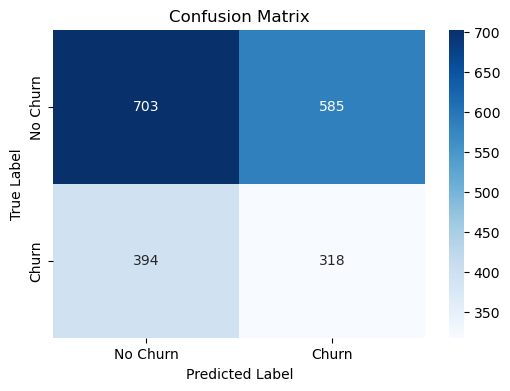

In [96]:
y_test_np = y_test_tensor.numpy()
predictions_np = predictions.numpy()

conf_matrix = confusion_matrix(y_test_np, predictions_np)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [97]:
print(classification_report(y_test_np, predictions_np, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.64      0.55      0.59      1288
       Churn       0.35      0.45      0.39       712

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.54      0.51      0.52      2000



In [76]:
torch.save(model.state_dict(), 'neural_network_model.pth')

In [77]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
!python app.py

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
/Users/pranav/miniforge3/lib/python3.10/site-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
Traceback (most recent call last):
  File "/Users/pranav/miniforge3/lib/python3.10/site-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "/Users/pranav/miniforge3/lib/python3.10/site-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "/Users/pranav/miniforge3/lib/python3.10/site-packages/gradio/blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "/Users/pranav/miniforge3/lib/python3.10/site-packages/gradio/blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ig